Data visualization - Feature Selection (wine) - ex.2 - Adam Trentowski, 162602

In [46]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MaxAbsScaler

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [19]:
dataset = pd.read_csv('D:/Projekty/DataVisualization/lab_02/files/wine.csv')

feature_names = dataset.columns[: -1]
X_data = dataset[feature_names]
y_data = dataset[dataset.columns[-1]]

X_data.head()

Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0    14.23        1.71  2.43  15.6  127     2.80        3.06   
1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2    13.16        2.36  2.67  18.6  101     2.80        3.24   
3    14.37        1.95  2.50  16.8  113     3.85        3.49   
4    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735

In [20]:
X_data.describe()

Alcohol  Malic.acid         Ash         Acl          Mg     Phenols  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean    13.000618    2.336348    2.366517   19.494944   99.741573    2.295112   
std      0.811827    1.117146    0.274344    3.339564   14.282484    0.625851   
min     11.030000    0.740000    1.360000   10.600000   70.000000    0.980000   
25%     12.362500    1.602500    2.210000   17.200000   88.000000    1.742500   
50%     13.050000    1.865000    2.360000   19.500000   98.000000    2.355000   
75%     13.677500    3.082500    2.557500   21.500000  107.000000    2.800000   
max     14.830000    5.800000    3.230000   30.000000  162.000000    3.880000   

       Flavanoids  Nonflavanoid.phenols     Proanth   Color.int         Hue  \
count  178.000000            178.000000  178.000000  178.000000  178.000000   
mean     2.029270              0.361854    1.590899    5.058090    0.957449   
std      0.998859              0.124453    0.572359    2.318286    0.228572   
min      0.340000              0.130000    0.410000    1.280000    0.480000   
25%      1.205000              0.270000    1.250000    3.220000    0.782500   
50%      2.135000              0.340000    1.555000    4.690000    0.965000   
75%      2.875000              0.437500    1.950000    6.200000    1.120000   
max      5.080000              0.660000    3.580000   13.000000    1.710000   

               OD      Proline  
count  178.000000   178.000000  
mean     2.611685   746.893258  
std      0.709990   314.907474  
min      1.270000   278.000000  
25%      1.937500   500.500000  
50%      2.780000   673.500000  
75%      3.170000   985.000000  
max      4.000000  1680.000000

In [21]:
y_data.head()

0    1
1    1
2    1
3    1
4    1
Name: Wine, dtype: int64

In [22]:
feature_names

Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

1. Filter Methods

1.1 Anova F-value

In [23]:
f_value = f_classif(X_data, y_data)

for feature in zip(feature_names, f_value[0]):
    print(feature)

('Alcohol', 135.07762424283948)
('Malic.acid', 36.94342496318376)
('Ash', 13.312901199989989)
('Acl', 35.77163740730817)
('Mg', 12.429584338150178)
('Phenols', 93.73300962036775)
('Flavanoids', 233.92587268154838)
('Nonflavanoid.phenols', 27.575417146965727)
('Proanth', 30.27138317022791)
('Color.int', 120.66401844100372)
('Hue', 101.31679539029965)
('OD', 189.97232057888206)
('Proline', 207.92037390217828)


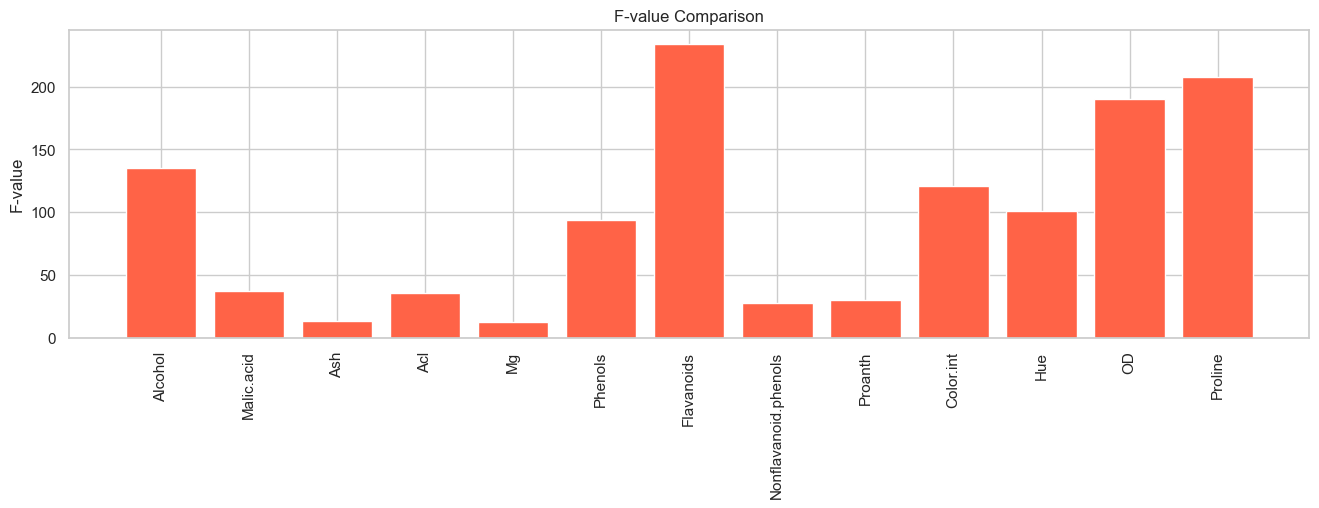

In [24]:
plt.figure(figsize=(16, 4))
plt.bar(x=feature_names, height=f_value[0], color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel("F-value")
plt.title("F-value Comparison")

plt.show()

1.2 Variance Threshold

In [44]:
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X_data)

selector = VarianceThreshold()
selector.fit_transform(X_scaled)

for feature in zip(feature_names, selector.variances_):
    print(feature)

('Alcohol', 0.002979870905839685)
('Malic.acid', 0.036890727732584)
('Ash', 0.007173633436316145)
('Acl', 0.0123222562386904)
('Mg', 0.007729131529593186)
('Phenols', 0.025872105983576345)
('Flavanoids', 0.038444475461574326)
('Nonflavanoid.phenols', 0.03535725232724578)
('Proanth', 0.02541698512850603)
('Color.int', 0.031622815666444336)
('Hue', 0.017766646041754944)
('OD', 0.03132840392627194)
('Proline', 0.03493820895896653)


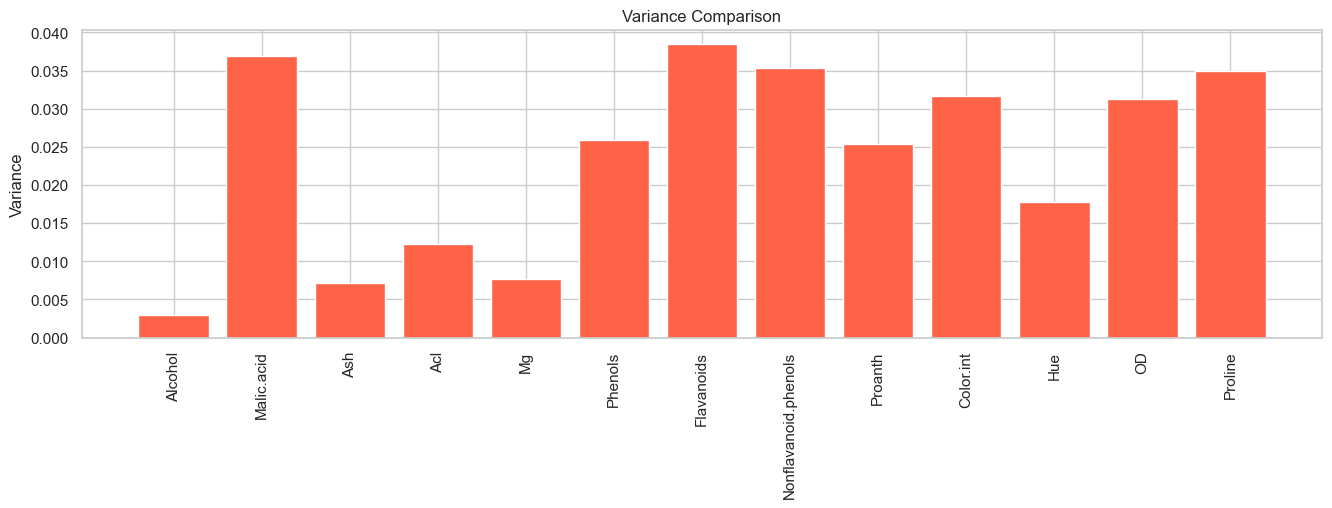

In [45]:
plt.figure(figsize=(16, 4))
plt.bar(x=feature_names, height=selector.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel("Variance")
plt.title("Variance Comparison")

plt.show()

In [47]:
selector = VarianceThreshold(threshold=0.01)
X_data_new = selector.fit_transform(X_scaled)

print(f'Number of features before variance thresholding: {X_data.shape[1]}')
print(f'Number of features after variance thresholding: {X_data_new.shape[1]}')

Number of features before variance thresholding: 13
Number of features after variance thresholding: 10


1.3 Mutual Information

In [48]:
MI_score = mutual_info_classif(X_data, y_data, random_state=0)

for feature in zip(feature_names, MI_score):
    print(feature)

('Alcohol', 0.4731586922796116)
('Malic.acid', 0.26923683289624445)
('Ash', 0.08215213872550398)
('Acl', 0.26176232873202077)
('Mg', 0.18065380862660052)
('Phenols', 0.40397339152412615)
('Flavanoids', 0.6664147135656704)
('Nonflavanoid.phenols', 0.11256429740887586)
('Proanth', 0.2956602978088432)
('Color.int', 0.5517594915785269)
('Hue', 0.44640885349275616)
('OD', 0.5056374221639404)
('Proline', 0.5666704889051473)


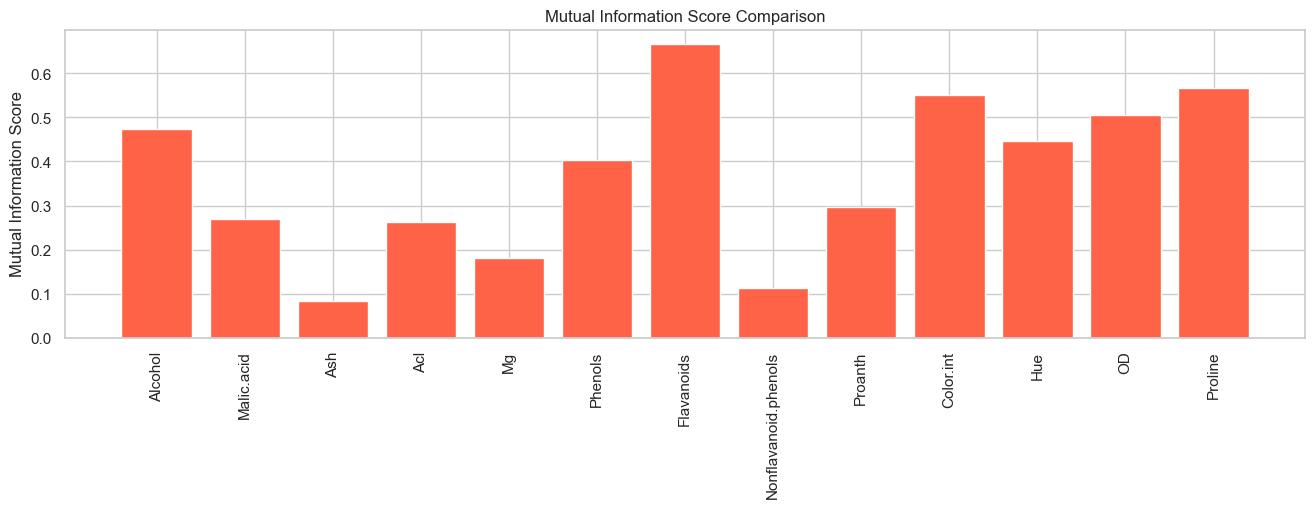

In [50]:
plt.figure(figsize=(16, 4))
plt.bar(x=feature_names, height=MI_score, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel("Mutual Information Score")
plt.title("Mutual Information Score Comparison")

plt.show()

1.4 Using selector object for selecting features

In [51]:
skb = SelectKBest(score_func=f_classif,  # f_classif as criteria to select features
                  k=7)  # select top 2 features based on the criteria

X_data_new = skb.fit_transform(X_data, y_data)

print(f'Number of features before feature selection: {X_data.shape[1]}')
print(f'Number of features after feature selection: {X_data_new.shape[1]}')

Number of features before feature selection: 13
Number of features after feature selection: 7


In [53]:
for feature_list_index in skb.get_support(indices=True):
    print(f'- {feature_names[feature_list_index]}')

- Alcohol
- Phenols
- Flavanoids
- Color.int
- Hue
- OD
- Proline


An alternative to SelectKBest is to use SelectPercentile, which selects fields by the percentile of the highest scores.

2. Wrapper Methods

2.1 Exhaustive Feature Selection (EFS)

In [54]:
lr = LogisticRegression()

efs = EFS(estimator=lr,
          min_features=1,
          max_features=13,
          scoring='accuracy',
          cv=5)

efs = efs.fit(X_data, y_data)

print(f'Best accuracy score: {efs.best_score_:.2f}')
print(f'Best subset (indices): {efs.best_idx_}')
print(f'Best subset (corresponding names): {efs.best_feature_names_}')

Features: 8191/8191

Best accuracy score: 0.97
Best subset (indices): (0, 1, 3, 6, 9, 12)
Best subset (corresponding names): ('Alcohol', 'Malic.acid', 'Acl', 'Flavanoids', 'Color.int', 'Proline')


Transform the dataset

In [56]:
X_data_new = efs.transform(X_data)

print(f'Number of features before transformation: {X_data.shape[1]}')
print(f'Number of features after transformation: {X_data_new.shape[1]}')

Number of features before transformation: 13
Number of features after transformation: 6


Show the performance of each subset of features

In [58]:
efs_results = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=False, inplace=True)
efs_results

feature_idx  \
7210  (0, 1, 2, 3, 6, 7, 9, 10, 12)   
4413        (0, 1, 3, 6, 9, 10, 12)   
5908      (0, 1, 2, 3, 6, 7, 9, 12)   
4155         (0, 1, 2, 3, 6, 9, 12)   
7211  (0, 1, 2, 3, 6, 7, 9, 11, 12)   
...                             ...   
4                              (4,)   
30                           (1, 7)   
1                              (1,)   
2                              (2,)   
7                              (7,)   

                                              cv_scores avg_score  \
7210  [0.9444444444444444, 0.9722222222222222, 0.944...  0.972222   
4413  [0.9444444444444444, 0.9722222222222222, 0.944...  0.972222   
5908  [0.9444444444444444, 0.9722222222222222, 0.944...  0.972222   
4155  [0.9444444444444444, 0.9722222222222222, 0.944...  0.972222   
7211  [0.9444444444444444, 0.9722222222222222, 0.944...  0.972222   
...                                                 ...       ...   
4     [0.4444444444444444, 0.5277777777777778, 0.5, ...  0.517302   
30    [0.5555555555555556, 0.5277777777777778, 0.388...  0.511587   
1     [0.5, 0.5277777777777778, 0.5, 0.5714285714285...  0.488413   
2     [0.4166666666666667, 0.5, 0.5, 0.4, 0.48571428...  0.460476   
7     [0.4722222222222222, 0.3333333333333333, 0.416...  0.444444   

                                          feature_names  ci_bound   std_dev  \
7210  (Alcohol, Malic.acid, Ash, Acl, Flavanoids, No...  0.031933  0.024845   
4413  (Alcohol, Malic.acid, Acl, Flavanoids, Color.i...  0.031933  0.024845   
5908  (Alcohol, Malic.acid, Ash, Acl, Flavanoids, No...  0.031933  0.024845   
4155  (Alcohol, Malic.acid, Ash, Acl, Flavanoids, Co...  0.031933  0.024845   
7211  (Alcohol, Malic.acid, Ash, Acl, Flavanoids, No...  0.031933  0.024845   
...                                                 ...       ...       ...   
4                                                 (Mg,)  0.064432  0.050131   
30                   (Malic.acid, Nonflavanoid.phenols)  0.092213  0.071745   
1                                         (Malic.acid,)  0.099386  0.077326   
2                                                (Ash,)  0.055544  0.043215   
7                               (Nonflavanoid.phenols,)  0.088555  0.068899   

       std_err  
7210  0.012423  
4413  0.012423  
5908  0.012423  
4155  0.012423  
7211  0.012423  
...        ...  
4     0.025065  
30    0.035872  
1     0.038663  
2     0.021608  
7     0.034449  

[8191 rows x 7 columns]

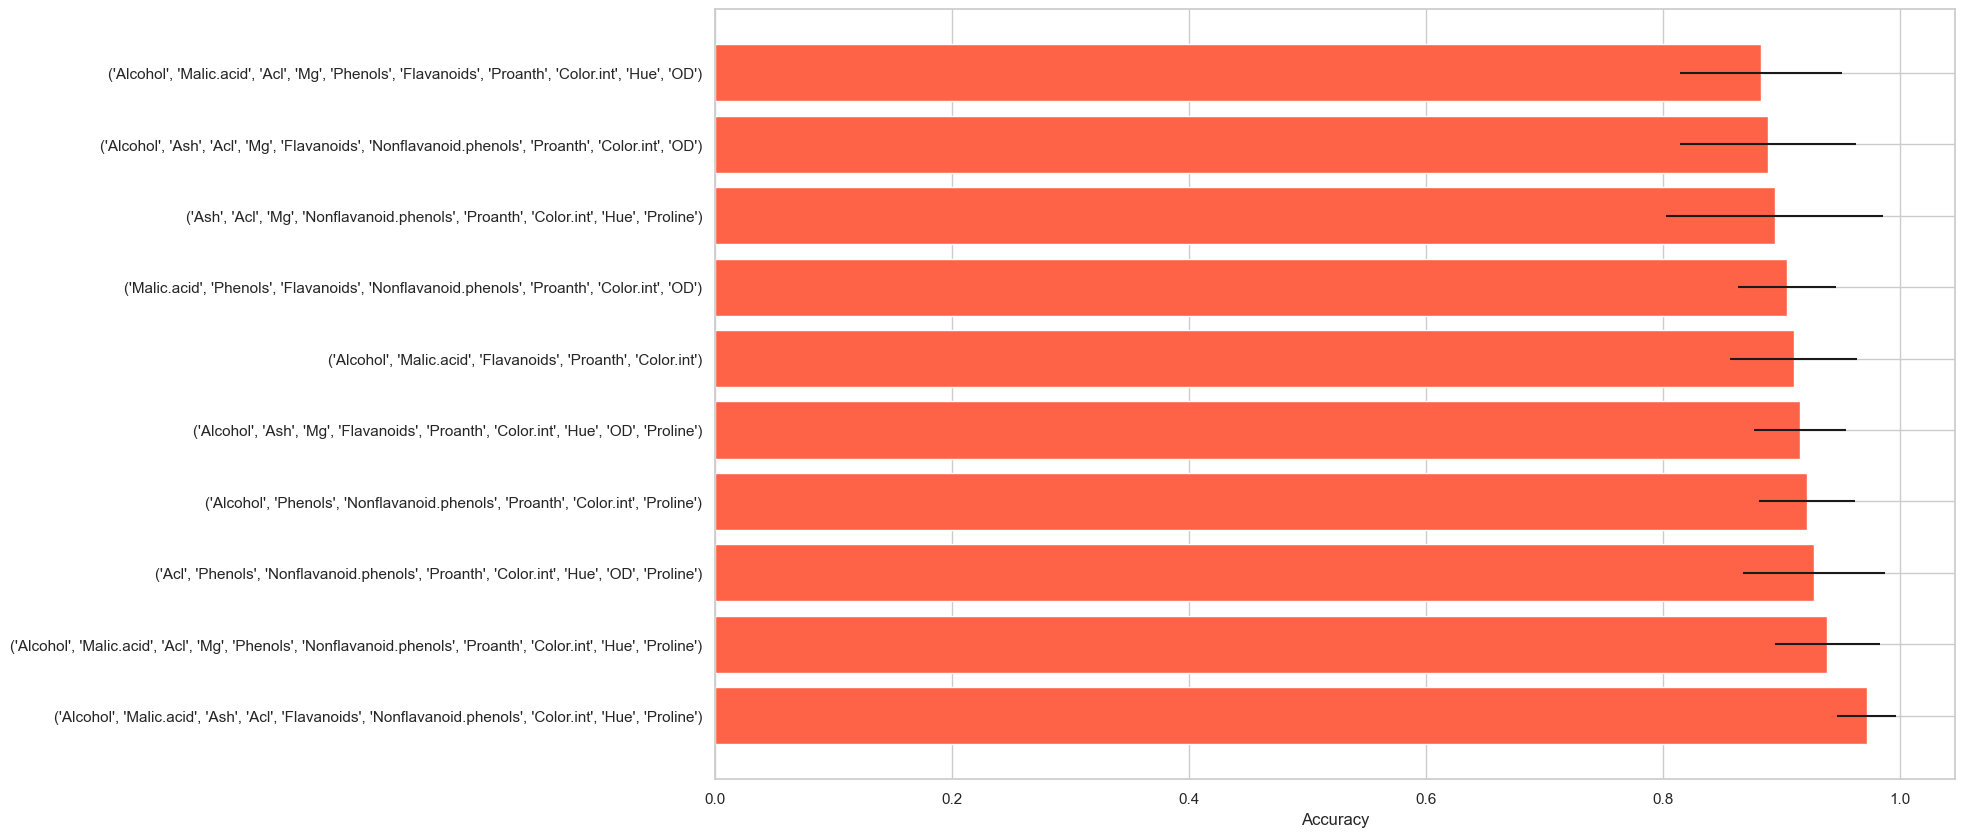

In [63]:
selected_results = efs_results.iloc[::500][:10]  # The first 10 every 500th records

fig, ax = plt.subplots(figsize=(16, 10))
y_pos = np.arange(len(selected_results))
ax.barh(y_pos,
        selected_results['avg_score'],
        xerr=selected_results['std_dev'],
        color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(selected_results['feature_names'])
ax.set_xlabel('Accuracy')

plt.show()

2.2 Sequential Forward Selection (SFS)

In [64]:
lr = LogisticRegression()

sfs = SFS(estimator=lr,
          k_features=(1, 13),
          forward=True,
          scoring='accuracy',
          cv=5)

sfs = sfs.fit(X_data, y_data)

print(f'Best accuracy score: {sfs.k_score_:.2f}')
print(f'Best subset (indices): {sfs.k_feature_idx_}')
print(f'Best subset (corresponding names): {sfs.k_feature_names_}')

Best accuracy score: 0.97
Best subset (indices): (0, 2, 3, 5, 6, 7, 9, 10, 11)
Best subset (corresponding names): ('Alcohol', 'Ash', 'Acl', 'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 'Color.int', 'Hue', 'OD')


Transform the dataset

In [65]:
X_data_new = sfs.transform(X_data)

print(f'Number of features before transformation: {X_data.shape[1]}')
print(f'Number of features after transformation: {X_data_new.shape[1]}')

Number of features before transformation: 13
Number of features after transformation: 9


Show the performance of each subset of features

In [67]:
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T
sfs_results.sort_values(by='avg_score', ascending=False, inplace=True)
sfs_results

feature_idx  \
9                (0, 2, 3, 5, 6, 7, 9, 10, 11)   
6                          (0, 2, 3, 6, 7, 10)   
7                       (0, 2, 3, 5, 6, 7, 10)   
5                             (0, 2, 3, 6, 10)   
10            (0, 2, 3, 5, 6, 7, 8, 9, 10, 11)   
12     (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12)   
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   
4                                 (0, 2, 3, 6)   
8                   (0, 2, 3, 5, 6, 7, 10, 11)   
3                                    (0, 3, 6)   
11        (0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12)   
2                                       (0, 6)   
1                                         (6,)   

                                            cv_scores avg_score  \
9   [0.8888888888888888, 1.0, 0.9444444444444444, ...  0.966667   
6   [0.8611111111111112, 1.0, 0.9444444444444444, ...  0.961111   
7   [0.8611111111111112, 1.0, 0.9444444444444444, ...  0.961111   
5   [0.8611111111111112, 1.0, 0.9722222222222222, ...  0.960952   
10  [0.9166666666666666, 0.9722222222222222, 0.972...  0.960794   
12  [0.8888888888888888, 0.9444444444444444, 0.944...  0.955556   
13  [0.8888888888888888, 0.9444444444444444, 0.944...  0.955556   
4   [0.8611111111111112, 1.0, 0.9444444444444444, ...  0.955397   
8   [0.8611111111111112, 0.9722222222222222, 0.888...  0.944444   
3   [0.8611111111111112, 0.8611111111111112, 0.972...  0.933175   
11  [0.8611111111111112, 0.8888888888888888, 0.944...  0.933175   
2   [0.8333333333333334, 0.9166666666666666, 0.944...  0.916032   
1   [0.6944444444444444, 0.8888888888888888, 0.694...  0.798413   

                                        feature_names  
9   (Alcohol, Ash, Acl, Phenols, Flavanoids, Nonfl...  
6   (Alcohol, Ash, Acl, Flavanoids, Nonflavanoid.p...  
7   (Alcohol, Ash, Acl, Phenols, Flavanoids, Nonfl...  
5                (Alcohol, Ash, Acl, Flavanoids, Hue)  
10  (Alcohol, Ash, Acl, Phenols, Flavanoids, Nonfl...  
12  (Alcohol, Malic.acid, Ash, Acl, Phenols, Flava...  
13  (Alcohol, Malic.acid, Ash, Acl, Mg, Phenols, F...  
4                     (Alcohol, Ash, Acl, Flavanoids)  
8   (Alcohol, Ash, Acl, Phenols, Flavanoids, Nonfl...  
3                          (Alcohol, Acl, Flavanoids)  
11  (Alcohol, Ash, Acl, Phenols, Flavanoids, Nonfl...  
2                               (Alcohol, Flavanoids)  
1                                       (Flavanoids,)

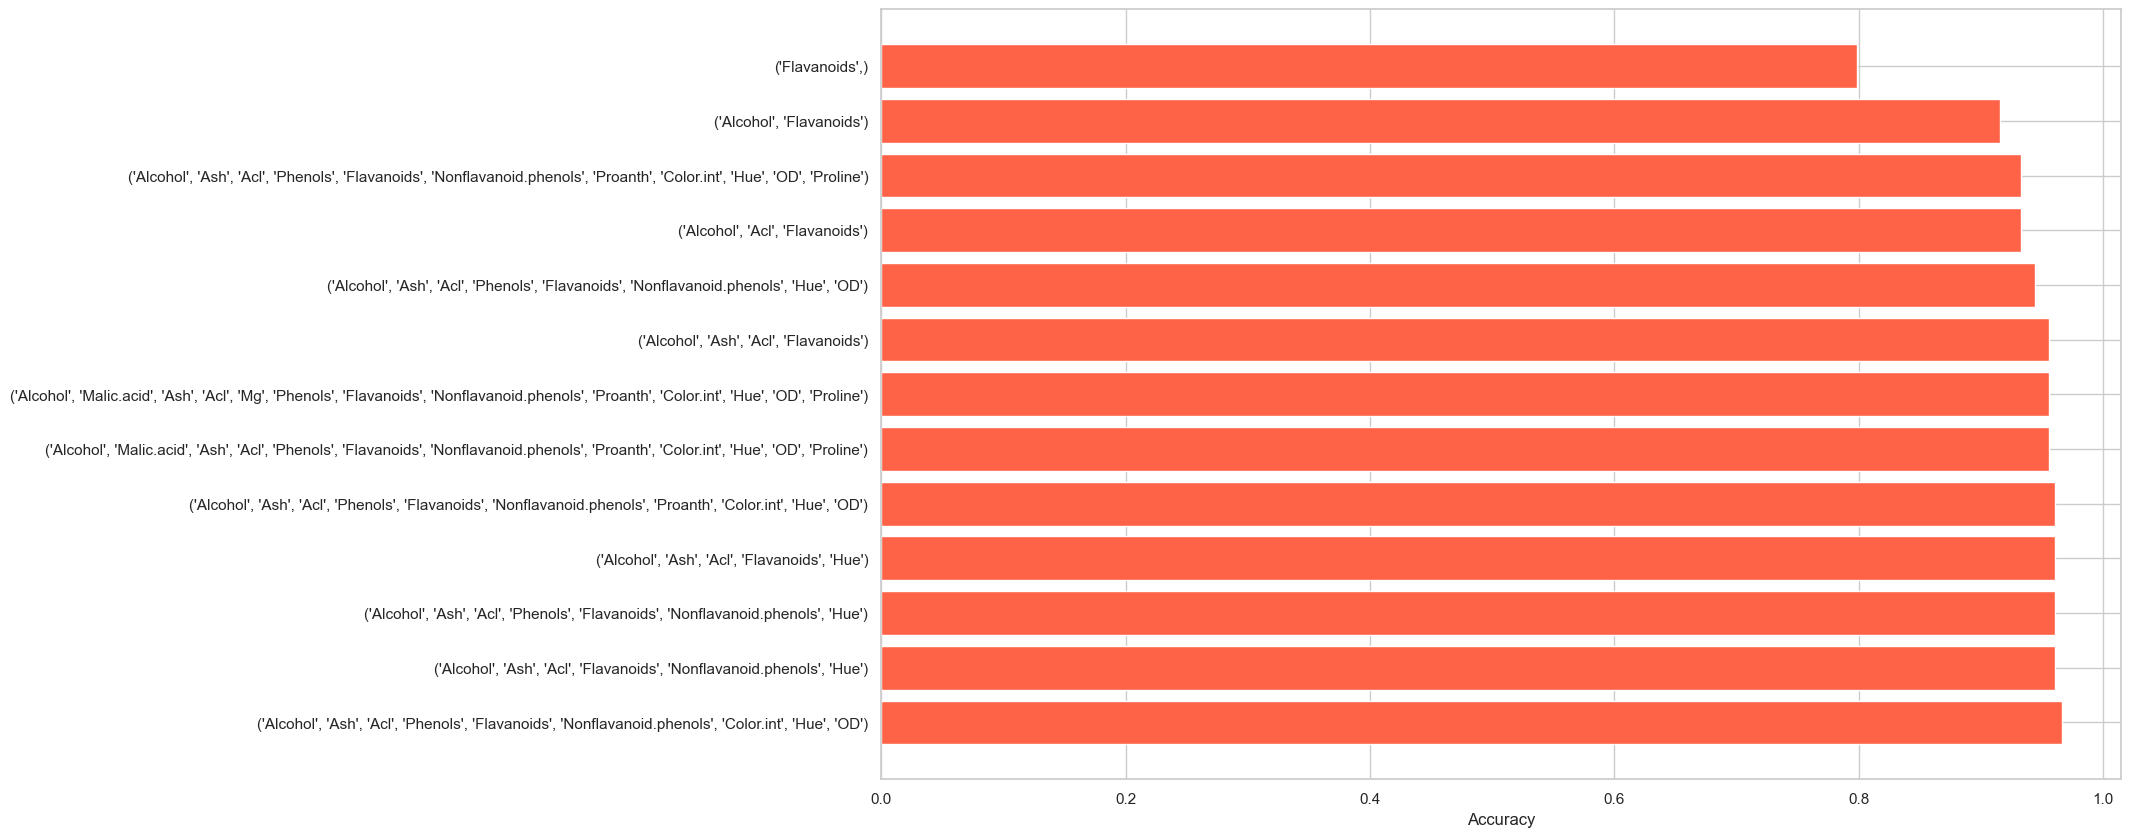

In [68]:
fig, ax = plt.subplots(figsize=(16, 10))
y_pos = np.arange(len(sfs_results))
ax.barh(y_pos,
        sfs_results['avg_score'],
        color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(sfs_results['feature_names'])
ax.set_xlabel('Accuracy')

plt.show()

2.3 Sequential Back Selection (SBS)

In [69]:
lr = LogisticRegression()

sbs = SFS(estimator=lr,
          k_features=(1, 13),
          forward=False,
          scoring='accuracy',
          cv=5)

sbs = sbs.fit(X_data, y_data)

print(f'Best accuracy score: {sbs.k_score_:.2f}')
print(f'Best subset (indices): {sbs.k_feature_idx_}')
print(f'Best subset (corresponding names): {sbs.k_feature_names_}')

Best accuracy score: 0.97
Best subset (indices): (0, 1, 3, 6, 9, 10, 12)
Best subset (corresponding names): ('Alcohol', 'Malic.acid', 'Acl', 'Flavanoids', 'Color.int', 'Hue', 'Proline')


Transform the dataset

In [70]:
X_data_new = sbs.transform(X_data)

print(f'Number of features before transformation: {X_data.shape[1]}')
print(f'Number of features after transformation: {X_data_new.shape[1]}')

Number of features before transformation: 13
Number of features after transformation: 7


Show the performance of each subset of features

In [71]:
sbs_results = pd.DataFrame.from_dict(sbs.subsets_).T
sbs_results.sort_values(by='avg_score', ascending=False, inplace=True)
sbs_results

feature_idx  \
7                      (0, 1, 3, 6, 9, 10, 12)   
6                          (0, 1, 3, 6, 9, 12)   
9                (0, 1, 3, 5, 6, 7, 9, 10, 12)   
8                   (0, 1, 3, 5, 6, 9, 10, 12)   
12     (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   
10            (0, 1, 3, 4, 5, 6, 7, 9, 10, 12)   
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   
11         (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 12)   
5                             (1, 3, 6, 9, 12)   
4                                (3, 6, 9, 12)   
3                                   (6, 9, 12)   
2                                      (6, 12)   
1                                         (6,)   

                                            cv_scores avg_score  \
7   [0.9444444444444444, 0.9722222222222222, 0.944...  0.972222   
6   [0.9444444444444444, 0.9722222222222222, 0.944...  0.972222   
9   [0.9444444444444444, 0.9444444444444444, 0.944...  0.966667   
8   [0.9444444444444444, 0.9444444444444444, 0.944...  0.966667   
12  [0.8888888888888888, 0.9444444444444444, 0.972...  0.961111   
10  [0.9166666666666666, 0.9444444444444444, 0.944...  0.961111   
13  [0.8888888888888888, 0.9444444444444444, 0.944...  0.955556   
11  [0.8888888888888888, 0.9444444444444444, 0.944...  0.955556   
5   [0.8888888888888888, 0.9444444444444444, 0.916...  0.944286   
4   [0.8333333333333334, 0.9722222222222222, 0.944...  0.944286   
3   [0.8888888888888888, 0.9166666666666666, 0.972...  0.944127   
2   [0.8055555555555556, 0.8888888888888888, 0.833...  0.894127   
1   [0.6944444444444444, 0.8888888888888888, 0.694...  0.798413   

                                        feature_names  
7   (Alcohol, Malic.acid, Acl, Flavanoids, Color.i...  
6   (Alcohol, Malic.acid, Acl, Flavanoids, Color.i...  
9   (Alcohol, Malic.acid, Acl, Phenols, Flavanoids...  
8   (Alcohol, Malic.acid, Acl, Phenols, Flavanoids...  
12  (Alcohol, Malic.acid, Acl, Mg, Phenols, Flavan...  
10  (Alcohol, Malic.acid, Acl, Mg, Phenols, Flavan...  
13  (Alcohol, Malic.acid, Ash, Acl, Mg, Phenols, F...  
11  (Alcohol, Malic.acid, Acl, Mg, Phenols, Flavan...  
5   (Malic.acid, Acl, Flavanoids, Color.int, Proline)  
4               (Acl, Flavanoids, Color.int, Proline)  
3                    (Flavanoids, Color.int, Proline)  
2                               (Flavanoids, Proline)  
1                                       (Flavanoids,)

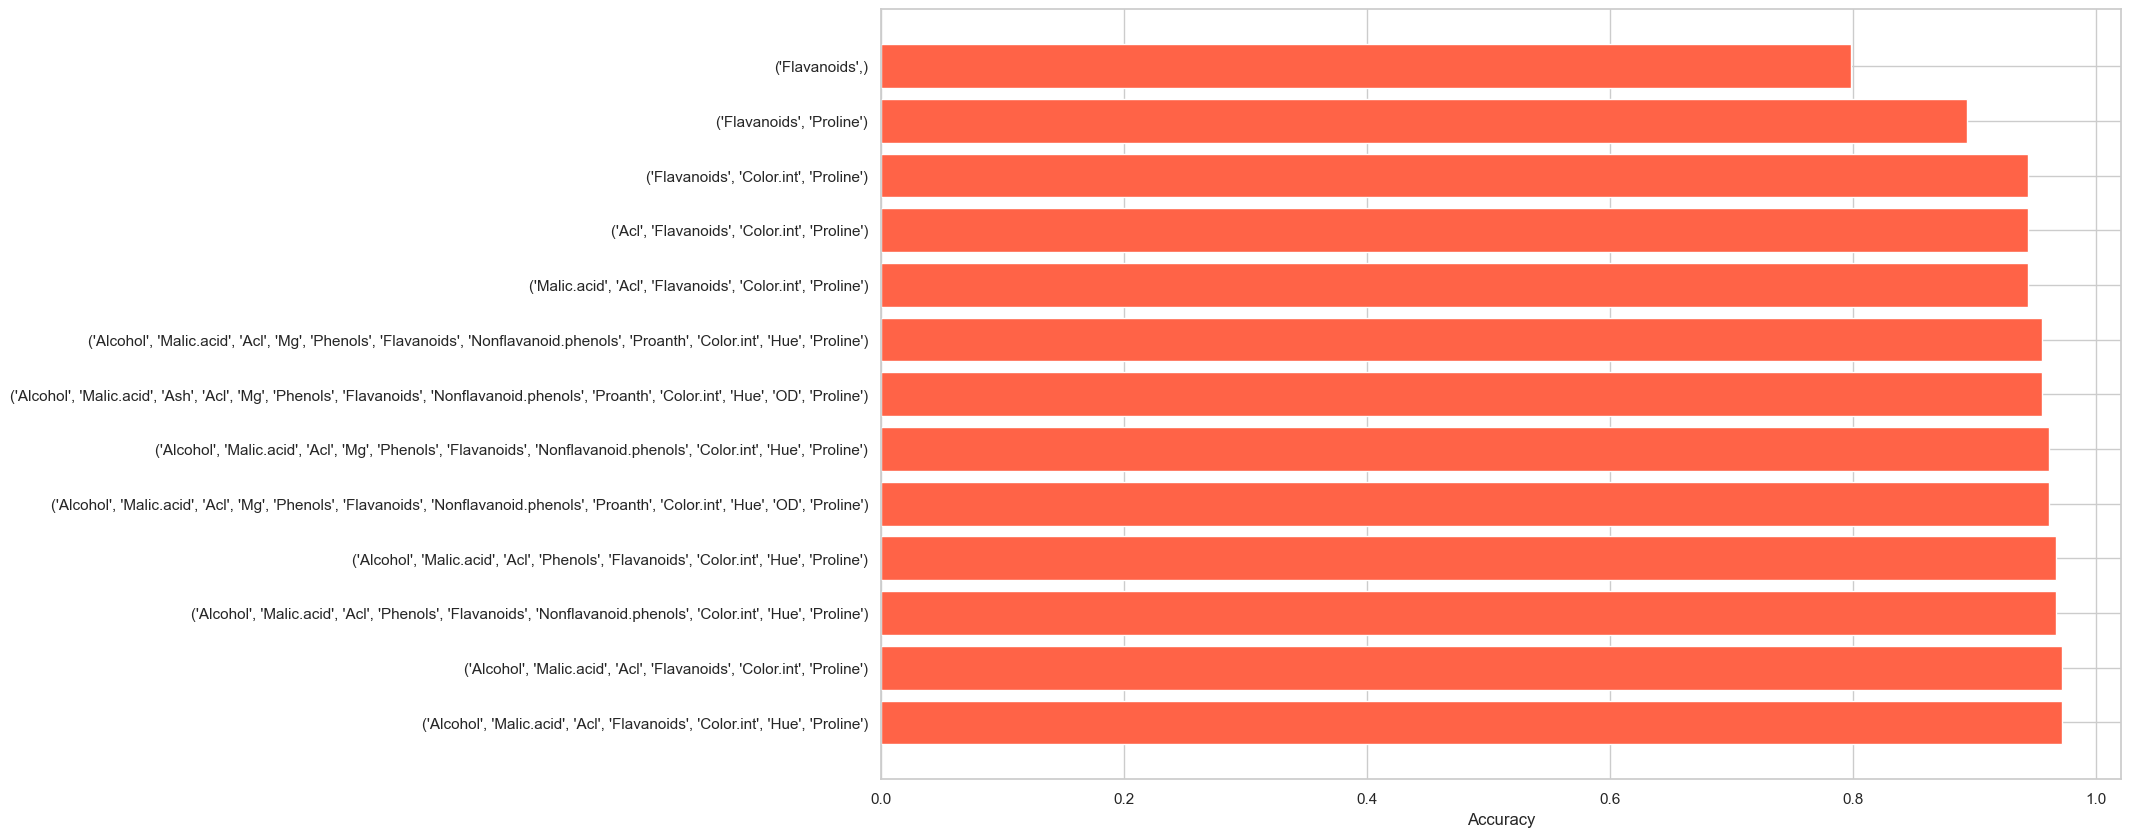

In [72]:
fig, ax = plt.subplots(figsize=(16, 10))
y_pos = np.arange(len(sbs_results))
ax.barh(y_pos,
        sbs_results['avg_score'],
        color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(sbs_results['feature_names'])
ax.set_xlabel('Accuracy')

plt.show()

### Compare the selection generated by EFS, SFS and SBS

In [73]:
print(f'Best subset by EFS: {efs.best_feature_names_}')
print(f'Best subset by SFS: {sfs.k_feature_names_}')
print(f'Best subset by SBS: {sbs.k_feature_names_}')

Best subset by EFS: ('Alcohol', 'Malic.acid', 'Acl', 'Flavanoids', 'Color.int', 'Proline')
Best subset by SFS: ('Alcohol', 'Ash', 'Acl', 'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 'Color.int', 'Hue', 'OD')
Best subset by SBS: ('Alcohol', 'Malic.acid', 'Acl', 'Flavanoids', 'Color.int', 'Hue', 'Proline')


3. Embedded Methods

3.1 Feature selection using Random Forest

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)

In [75]:
rfc = RandomForestClassifier(random_state=0, criterion='gini')
rfc.fit(X_train, y_train)

for feature in zip(feature_names, rfc.feature_importances_):
    print(feature)

('Alcohol', 0.08874680417464678)
('Malic.acid', 0.02978162225833429)
('Ash', 0.01663816502242051)
('Acl', 0.039189944896389294)
('Mg', 0.022961768966889996)
('Phenols', 0.06157894335524699)
('Flavanoids', 0.1452282715474674)
('Nonflavanoid.phenols', 0.014258178736917097)
('Proanth', 0.0231074613019167)
('Color.int', 0.19481936739572966)
('Hue', 0.08026645353404331)
('OD', 0.11907506442694837)
('Proline', 0.16434795438304953)


3.2 Using selector object for selecting features

In [84]:
rfc = RandomForestClassifier(random_state=0, criterion='gini')

sfm = SelectFromModel(estimator=rfc, threshold=0.05)
sfm = sfm.fit(X_train, y_train)

print('The most important features based on random forest classifier:')
for feature_list_index in sfm.get_support(indices=True):
    print(f'- {feature_names[feature_list_index]}')

The most important features based on random forest classifier:
- Alcohol
- Phenols
- Flavanoids
- Color.int
- Hue
- OD
- Proline


In [85]:
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

print(f'Number of features before transformation: {X_train.shape[1]}')
print(f'Number of features after transformation: {X_important_train.shape[1]}')

Number of features before transformation: 13
Number of features after transformation: 7


3.3 Comparison of classifier accuracy with full features and limited features

In [86]:
rfc_full = RandomForestClassifier(random_state=0, criterion='gini')
rfc_full.fit(X_train, y_train)
pred_full = rfc_full.predict(X_test)

print(f'The accuracy of classifier with full features {accuracy_score(y_test, pred_full)}')

The accuracy of classifier with full features 0.9814814814814815


In [87]:
rfc_lim = RandomForestClassifier(random_state=0, criterion='gini')
rfc_lim.fit(X_important_train, y_train)
pred_lim = rfc_lim.predict(X_important_test)

print(f'The accuracy of classifier with limited features {accuracy_score(y_test, pred_lim)}')

The accuracy of classifier with limited features 0.9629629629629629
